In [1]:
#Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

### **Loading Data**

In [2]:
data = pd.read_csv('yes_no_main.csv')


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#no of rows and columns
data.shape

(247, 10)

In [5]:
#getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Car_Make                   247 non-null    object
 1   Car_Model                  247 non-null    object
 2   Year                       247 non-null    int64 
 3   Kms_Driven                 247 non-null    int64 
 4   Engine_Oil_Change          247 non-null    object
 5   Brake_Pad_Change           247 non-null    object
 6   Transmission_Fluid_Change  247 non-null    object
 7   Tire_Rotation              247 non-null    object
 8   Spark_Plug_Change          247 non-null    object
 9   Maintenance_Required       247 non-null    object
dtypes: int64(2), object(8)
memory usage: 19.4+ KB


In [6]:
#for first 5 rows
data.head()

Car_Make Car_Model  Year  Kms_Driven Engine_Oil_Change Brake_Pad_Change  \
0  Hyundai      Polo  2009       55000               Yes               No   
1     Audi     Nexon  2016       35000               Yes               No   
2      Kia      City  2009       65000                No              Yes   
3   Toyota    Innova  2009       15000               Yes               No   
4      Kia     Amaze  2009       30000                No              Yes   

  Transmission_Fluid_Change Tire_Rotation Spark_Plug_Change  \
0                        No           Yes               Yes   
1                        No           Yes                No   
2                        No           Yes                No   
3                       Yes            No               Yes   
4                        No           Yes               Yes   

  Maintenance_Required  
0                   No  
1                  Yes  
2                  Yes  
3                   No  
4                  Yes

In [7]:
#for last 5 rows
data.tail()

Car_Make          Car_Model  Year  Kms_Driven Engine_Oil_Change  \
242   Hyundai             Trajet  2020       46000                No   
243      Tata          Indigo CS  2021       56000               Yes   
244  Mahindra      Bolero Pik-Up  2022       36000                No   
245    Toyota  Fortuner Legender  2023       51000               Yes   
246     Honda        CR-V Hybrid  2023       41000                No   

    Brake_Pad_Change Transmission_Fluid_Change Tire_Rotation  \
242              Yes                       Yes            No   
243               No                        No           Yes   
244              Yes                       Yes            No   
245               No                       Yes           Yes   
246              Yes                        No           Yes   

    Spark_Plug_Change Maintenance_Required  
242               Yes                   No  
243               Yes                  Yes  
244                No                  Yes  
245               Yes                   No  
246                No                  Yes

In [8]:
#statistical measures about the data
data.describe().T

count          mean           std      min      25%      50%  \
Year        247.0   2015.048583      6.091917   2009.0   2009.0   2014.0   
Kms_Driven  247.0  42931.174089  20753.472622  10000.0  30000.0  40000.0   

                75%       max  
Year         2021.0    2023.0  
Kms_Driven  53000.0  110000.0

In [9]:
##feature engineering
#To get null values of column
data.isnull().sum()

Car_Make                     0
Car_Model                    0
Year                         0
Kms_Driven                   0
Engine_Oil_Change            0
Brake_Pad_Change             0
Transmission_Fluid_Change    0
Tire_Rotation                0
Spark_Plug_Change            0
Maintenance_Required         0
dtype: int64

<Axes: >

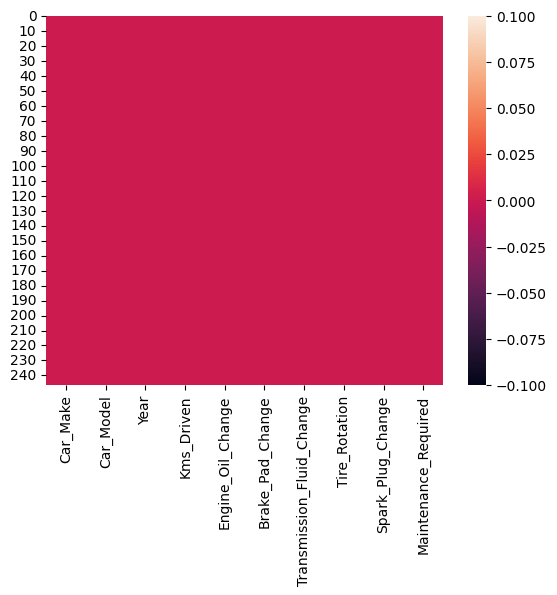

In [10]:
#heatmap to show null values
sns.heatmap(data.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [11]:
data.dtypes

Car_Make                     object
Car_Model                    object
Year                          int64
Kms_Driven                    int64
Engine_Oil_Change            object
Brake_Pad_Change             object
Transmission_Fluid_Change    object
Tire_Rotation                object
Spark_Plug_Change            object
Maintenance_Required         object
dtype: object

### **Data Cleaning And Visualization**

In [12]:
data = data.drop('Car_Make', axis=1)


In [13]:
data = data.drop('Car_Model', axis=1)


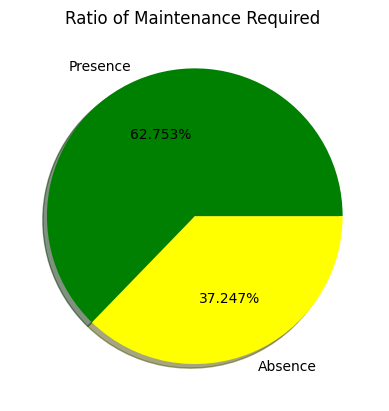

In [14]:
#To show the Fuel type using pie chart
plt.pie(x = data['Maintenance_Required'].value_counts() ,autopct='%1.3f%%' ,labels=['Presence', 'Absence'], colors=['green', 'yellow'], shadow=True)
plt.title('Ratio of Maintenance Required ')
plt.show()


<Axes: xlabel='Maintenance_Required', ylabel='count'>

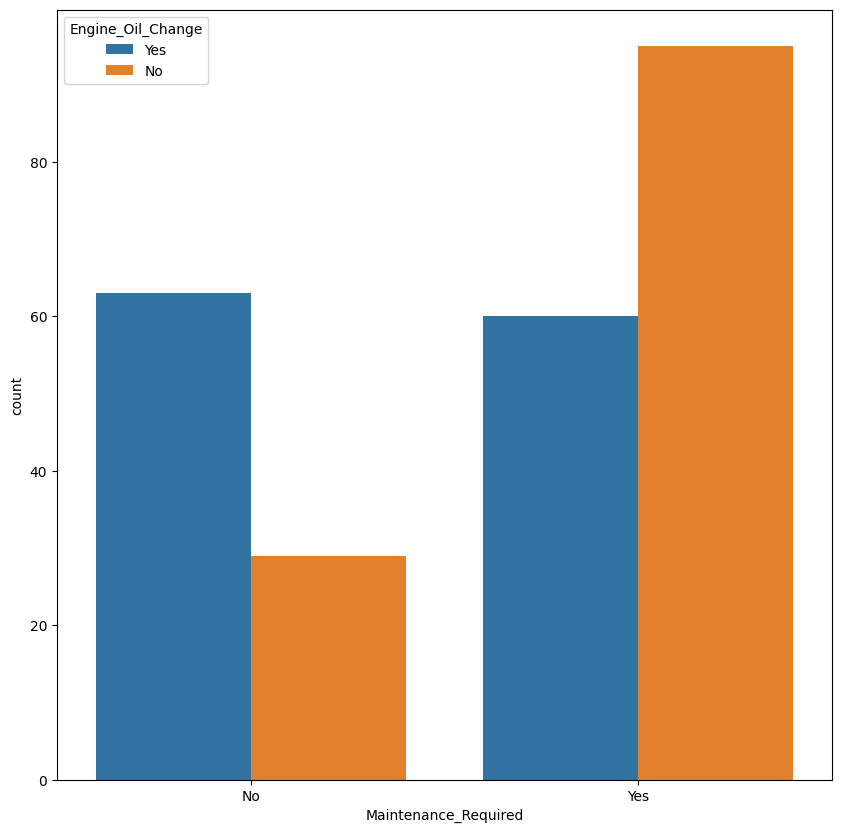

In [15]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=data,hue='Engine_Oil_Change',x='Maintenance_Required')

In [16]:
data["Year_old"]=2024-data["Year"]

In [17]:
data = data.drop('Year', axis=1)


In [18]:
# FMaintenance required to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Engine_Oil_Change"] = encoder.fit_transform(data["Engine_Oil_Change"])
data["Brake_Pad_Change"] = encoder.fit_transform(data["Brake_Pad_Change"])
data["Transmission_Fluid_Change"] = encoder.fit_transform(data["Transmission_Fluid_Change"])
data["Tire_Rotation"] = encoder.fit_transform(data["Tire_Rotation"])
data["Spark_Plug_Change"] = encoder.fit_transform(data["Spark_Plug_Change"])
data["Maintenance_Required"] = encoder.fit_transform(data["Maintenance_Required"])

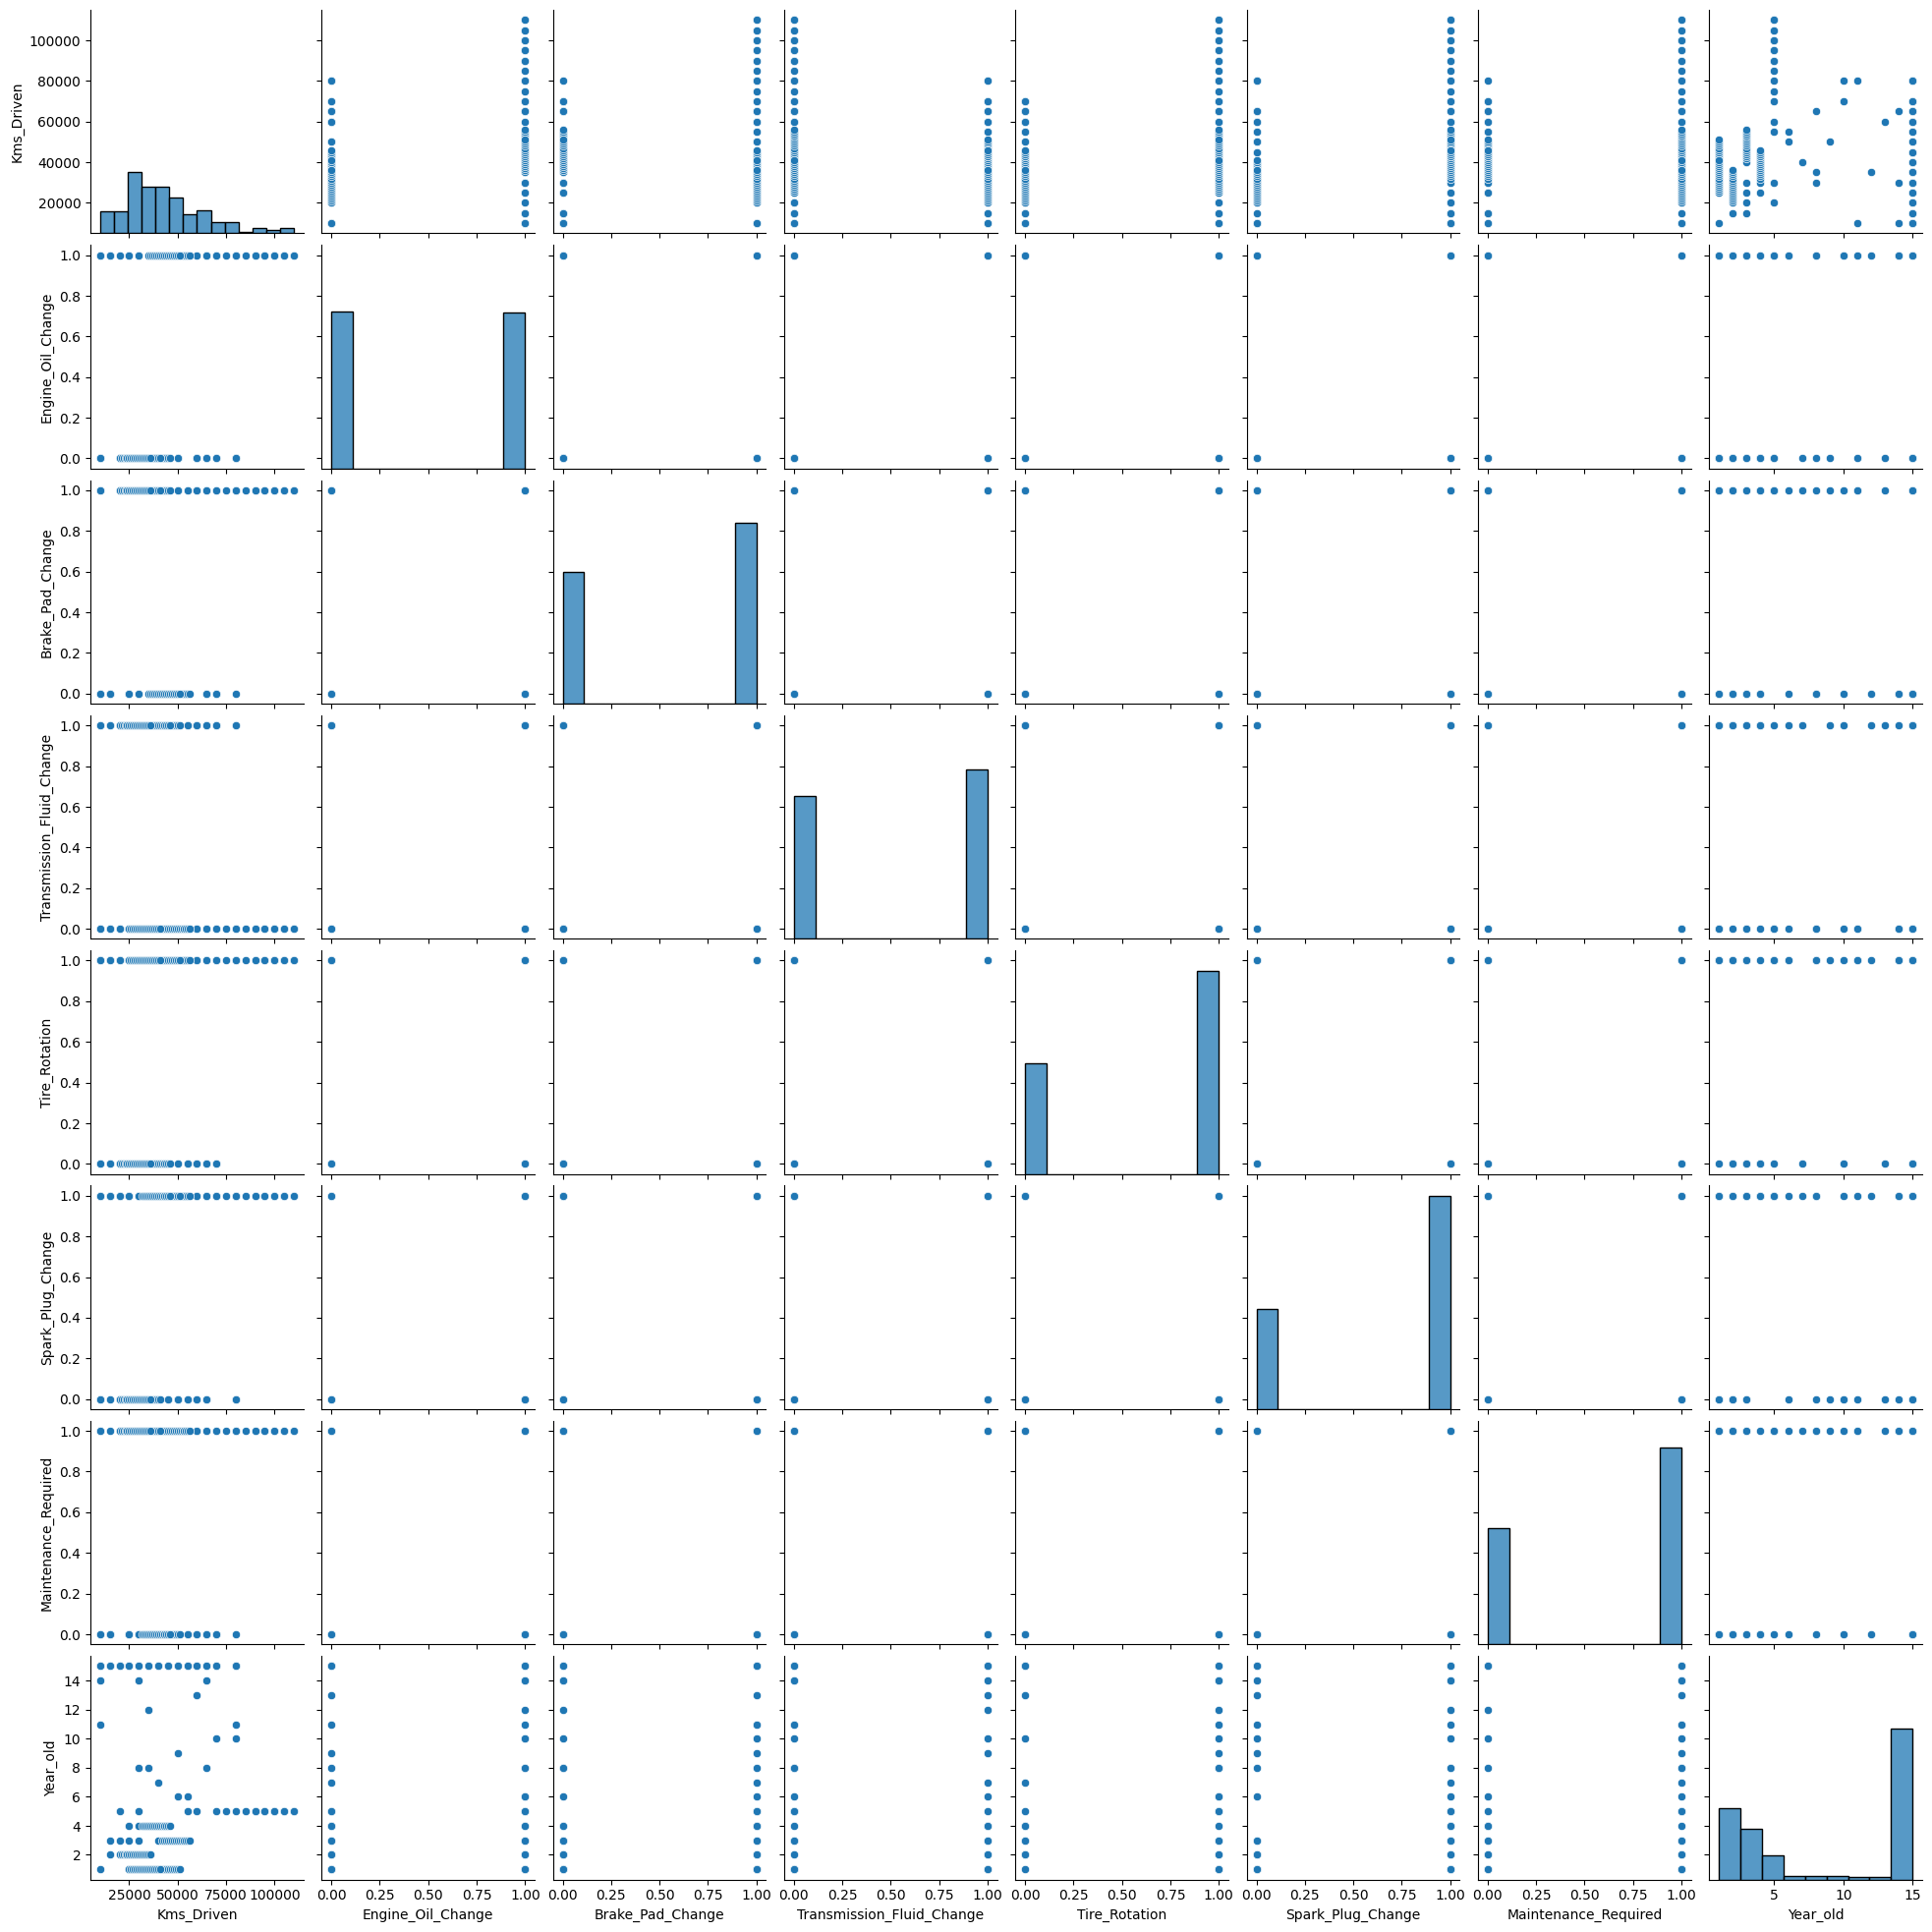

In [19]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

array([[<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Engine_Oil_Change'}>,
        <Axes: title={'center': 'Brake_Pad_Change'}>],
       [<Axes: title={'center': 'Transmission_Fluid_Change'}>,
        <Axes: title={'center': 'Tire_Rotation'}>,
        <Axes: title={'center': 'Spark_Plug_Change'}>],
       [<Axes: title={'center': 'Maintenance_Required'}>,
        <Axes: title={'center': 'Year_old'}>, <Axes: >]], dtype=object)

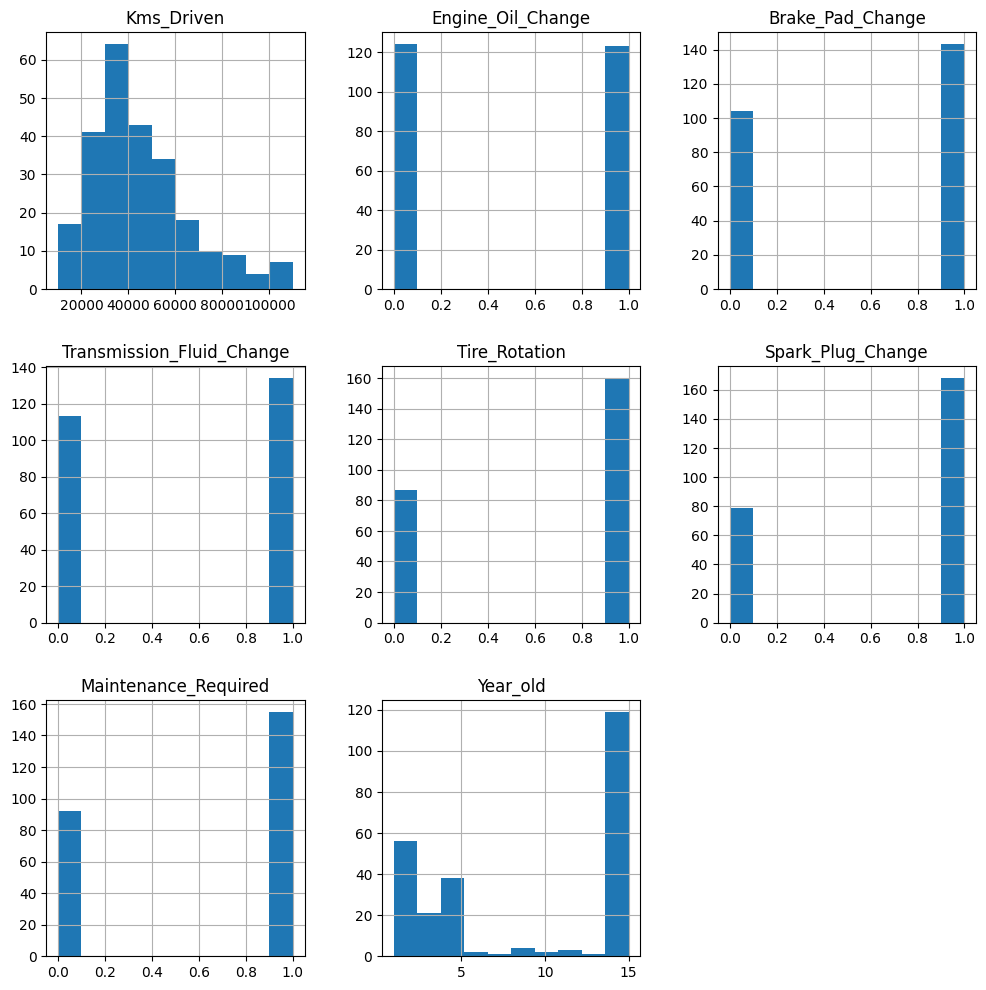

In [20]:
#to visualize the feature using histogram
data.hist(figsize=(12,12))

In [21]:
print(data.corr())


                           Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  \
Kms_Driven                   1.000000           0.292616          0.020129   
Engine_Oil_Change            0.292616           1.000000         -0.659460   
Brake_Pad_Change             0.020129          -0.659460          1.000000   
Transmission_Fluid_Change   -0.201200          -0.109364         -0.091828   
Tire_Rotation                0.231631           0.327573         -0.182512   
Spark_Plug_Change            0.244993           0.492002         -0.408990   
Maintenance_Required         0.016443          -0.287842          0.428489   
Year_old                    -0.011762          -0.006692         -0.091788   

                           Transmission_Fluid_Change  Tire_Rotation  \
Kms_Driven                                 -0.201200       0.231631   
Engine_Oil_Change                          -0.109364       0.327573   
Brake_Pad_Change                           -0.091828      -0.182512   
Transmission_

<Axes: >

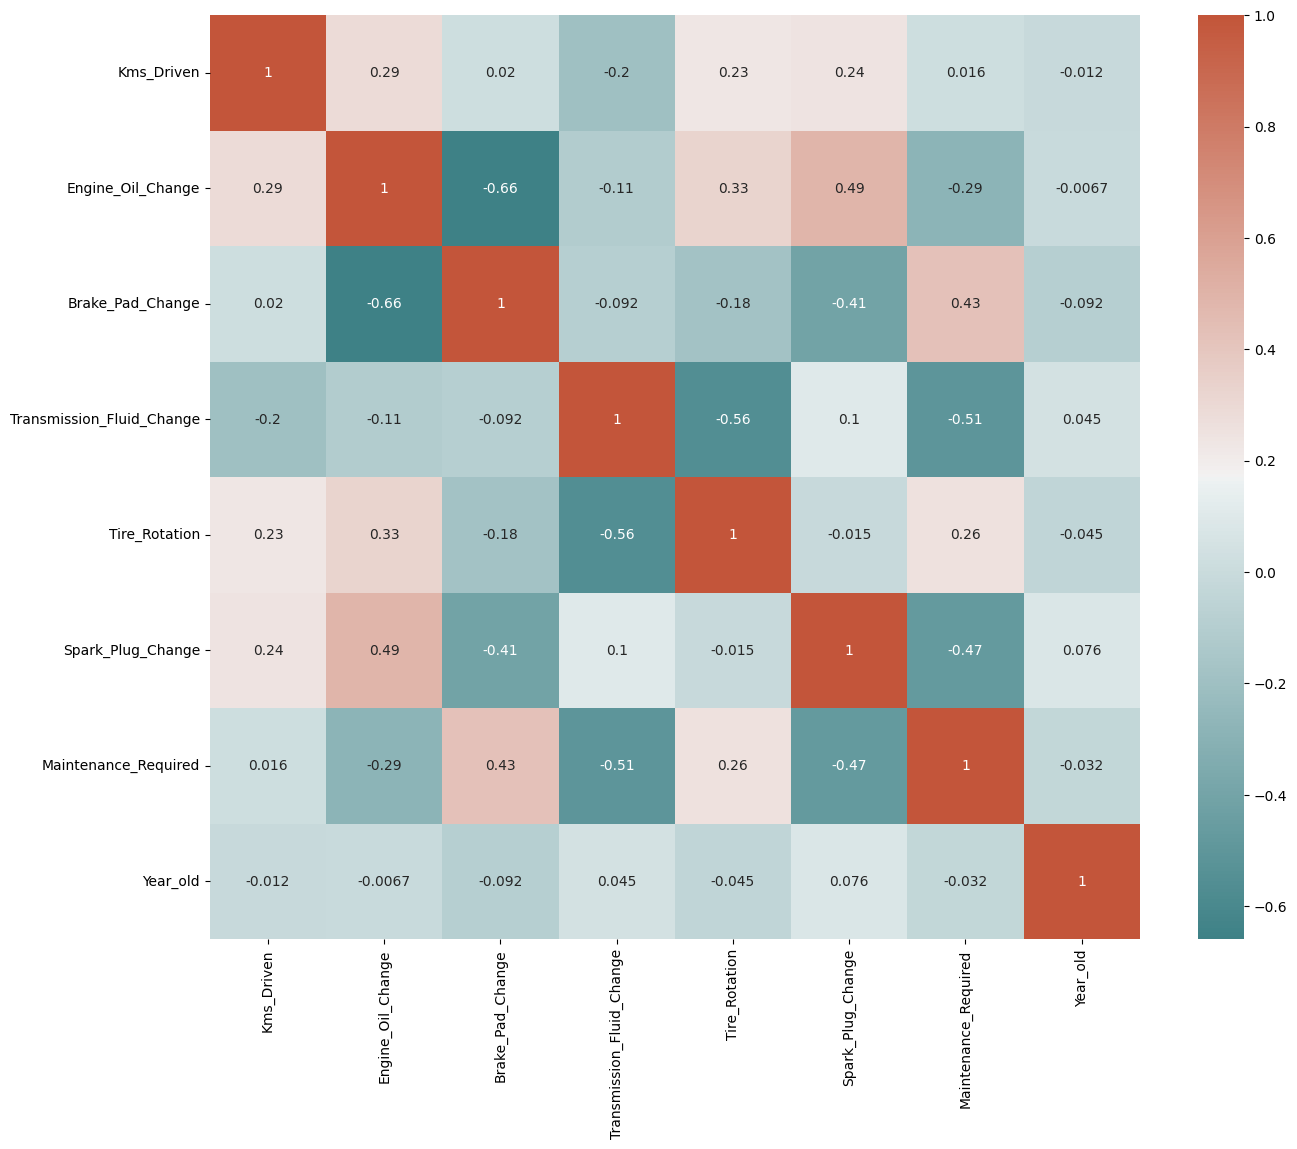

In [22]:
#correlation matrix
#it is to find the dependency of column to target value
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

In [23]:
#Training and testing
X = data.drop('Maintenance_Required',axis=1)
y = data['Maintenance_Required']

In [24]:
# Checking For Important Features!
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
model.feature_importances_

array([0.19430323, 0.05074685, 0.08370973, 0.26966164, 0.041137  ,
       0.26698968, 0.09345188])

<Axes: >

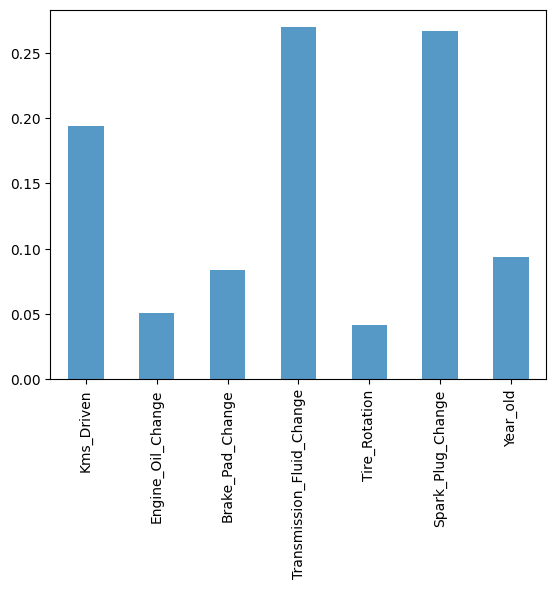

In [26]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90)

In [27]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Kms_Driven                 247.0  42931.174089  20753.472622  10000.0   
Engine_Oil_Change          247.0      0.497976      0.501011      0.0   
Brake_Pad_Change           247.0      0.578947      0.494730      0.0   
Transmission_Fluid_Change  247.0      0.542510      0.499201      0.0   
Tire_Rotation              247.0      0.647773      0.478634      0.0   
Spark_Plug_Change          247.0      0.680162      0.467361      0.0   
Maintenance_Required       247.0      0.627530      0.484444      0.0   
Year_old                   247.0      8.951417      6.091917      1.0   

                               25%      50%      75%       max  
Kms_Driven                 30000.0  40000.0  53000.0  110000.0  
Engine_Oil_Change              0.0      0.0      1.0       1.0  
Brake_Pad_Change               0.0      1.0      1.0       1.0  
Transmission_Fluid_Change      0.0      1.0      1.0       1.0  
Tire_Rotation                  0.0      1.0      1.0       1.0  
Spark_Plug_Change              0.0      1.0      1.0       1.0  
Maintenance_Required           0.0      1.0      1.0       1.0  
Year_old                       3.0     10.0     15.0      15.0

In [28]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=6)

In [29]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (197, 7)
Shape of y_train (197,)
Shape of X_test (50, 7)
Shape of y_test (50,)


Decision Tree
ACCURACY score on train data 93.90862944162437
Accuracy Score on test data 80.0
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.94      0.75        16
           1       0.96      0.74      0.83        34

    accuracy                           0.80        50
   macro avg       0.79      0.84      0.79        50
weighted avg       0.85      0.80      0.81        50
 

Confusion Matrix
 [[15  1]
 [ 9 25]]


<Axes: >

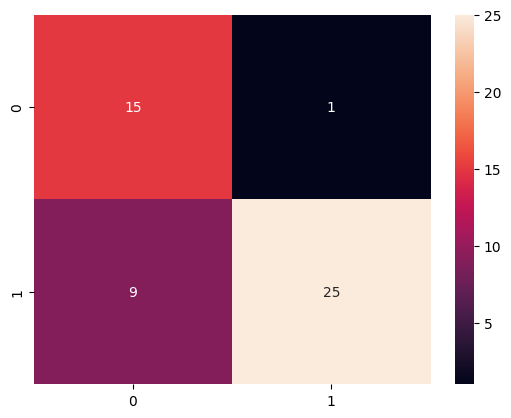

In [31]:
#Decision Tree
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( max_depth=5)
tree.fit(X_train, y_train)
pred=tree.predict(X_test)
acc=accuracy_score(y_test,pred)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, tree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Naive Bayes
ACCURACY score on train data 79.69543147208121
ACCURACY on test data 88.0
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.97      0.85      0.91        34

    accuracy                           0.88        50
   macro avg       0.86      0.90      0.87        50
weighted avg       0.90      0.88      0.88        50
 

Confusion Matrix [[15  1]
 [ 5 29]]


<Axes: >

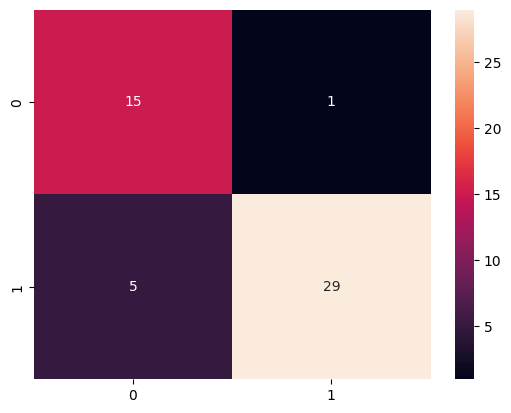

In [32]:
##Naive Bayes
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Logistic Regression
ACCURACY score on train data 85.78680203045685
Accuracy Score on test data 90.0
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.97      0.88      0.92        34

    accuracy                           0.90        50
   macro avg       0.88      0.91      0.89        50
weighted avg       0.91      0.90      0.90        50
 

Confusion Matrix [[15  1]
 [ 4 30]]


<Axes: >

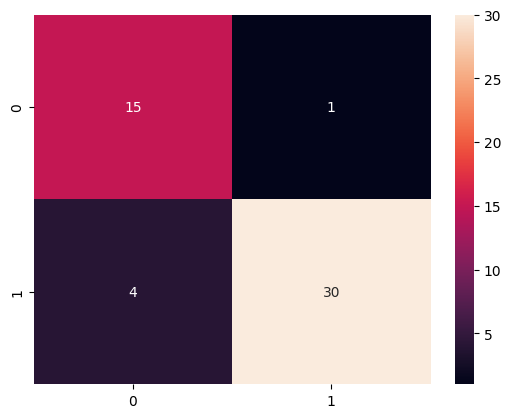

In [33]:
#Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [34]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 9


KNN
ACCURACY score on train data 87.81725888324873
Accuracy Score on test data 96.0
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.97      0.97      0.97        34

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50
 

Confusion Matrix
 [[15  1]
 [ 1 33]]


<Axes: >

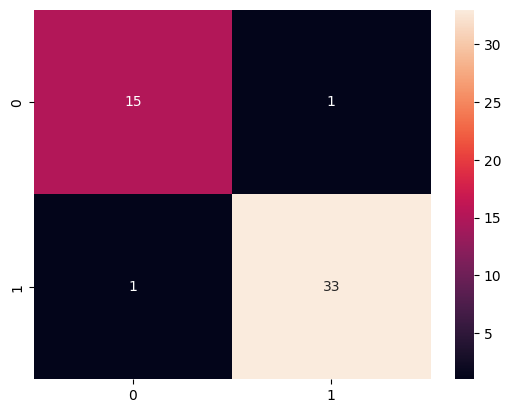

In [35]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=9,metric="minkowski")
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')


In [36]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 501}


Random Forest Classification
ACCURACY score on train data 92.38578680203045
Accuracy Score on test data 88.0
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.94      0.88      0.91        34

    accuracy                           0.88        50
   macro avg       0.86      0.88      0.87        50
weighted avg       0.89      0.88      0.88        50
 

Confusion Matrix [[14  2]
 [ 4 30]]


<Axes: >

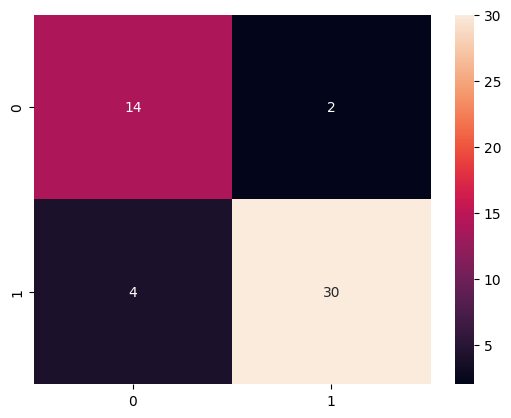

In [37]:
#Random Forest classifier
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 601, criterion = 'entropy', random_state = 101,max_depth=4)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [38]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.9, 0.92, 0.9, 0.9]


SVM
ACCURACY score on train data 90.86294416243655
Accuracy Score on test data 92.0
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.97      0.91      0.94        34

    accuracy                           0.92        50
   macro avg       0.90      0.92      0.91        50
weighted avg       0.93      0.92      0.92        50
 

Confusion Matrix [[15  1]
 [ 3 31]]


<Axes: >

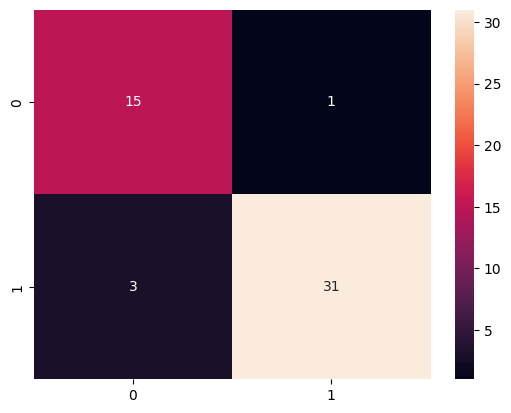

In [39]:
#SVM
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='poly')
sup.fit(X_train,y_train)
pred = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [40]:
#All Model Accuracy with Visual------6 models
Algo=[tree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

Algorithms  Accuracy
0        Decision Tree      80.0
1          K Neighbors      96.0
2          Naive Bayes      88.0
3  Logistic Regression      90.0
4        Random Forest      88.0
5                  SVM      92.0

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'SVM')])

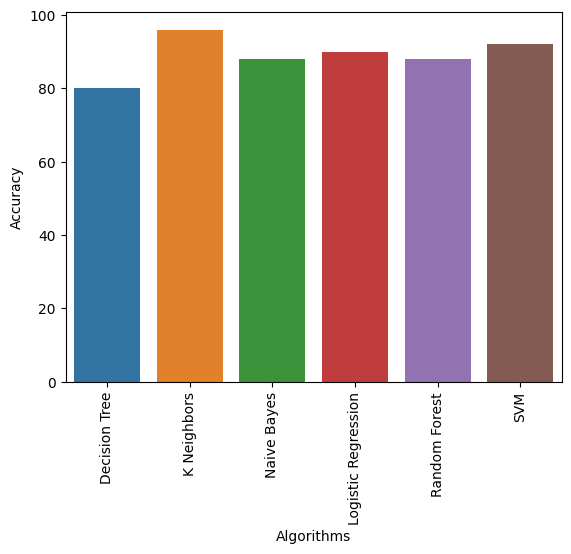

In [41]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)
plt.xticks(rotation=90) 

### **Exporting the tested model to a pickle file**

In [80]:
import pickle
with open('yes_no_main.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(KNN, file)

In [43]:
#To give input we show data here
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       55000                  1                 0                          0   
1       35000                  1                 0                          0   
2       65000                  0                 1                          0   
3       15000                  1                 0                          1   
4       30000                  0                 1                          0   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0              1                  1                     0        15  
1              1                  0                     1         8  
2              1                  0                     1        15  
3              0                  1                     0        15  
4              1                  1                     1        15

In [44]:
#Here we give input to model and predict
predicted = KNN.predict([[35000,1,0,0,1,0,8]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 1
Need of maintanance


In [45]:
#Here we give input to model and predict
predicted = tree.predict([[55000,1,0,0,1,1,15]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


In [79]:
import pickle
with open('yes_no_main_tree.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(tree, file)

Applying Explainable AI


In [46]:
#importing shap 
import shap
import matplotlib.pyplot as plt

Variable Importance Plot - Global Interpretation


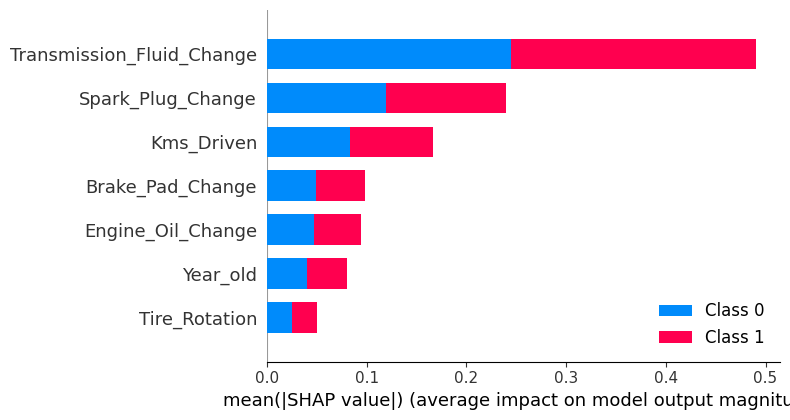

In [47]:
#Using decision Tree model
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(tree)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


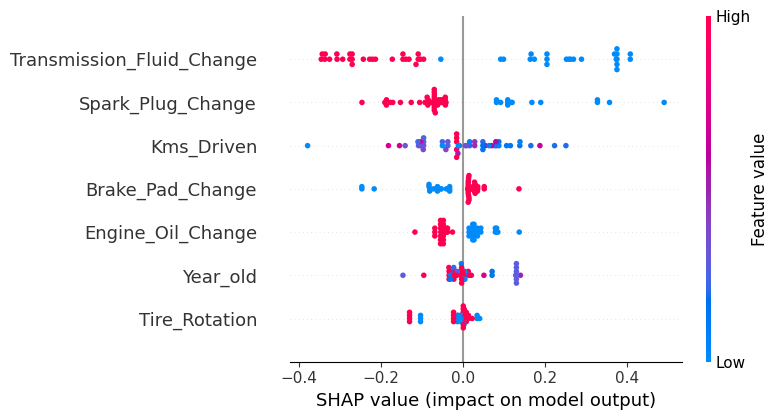

In [48]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

Variable Importance Plot - Global Interpretation


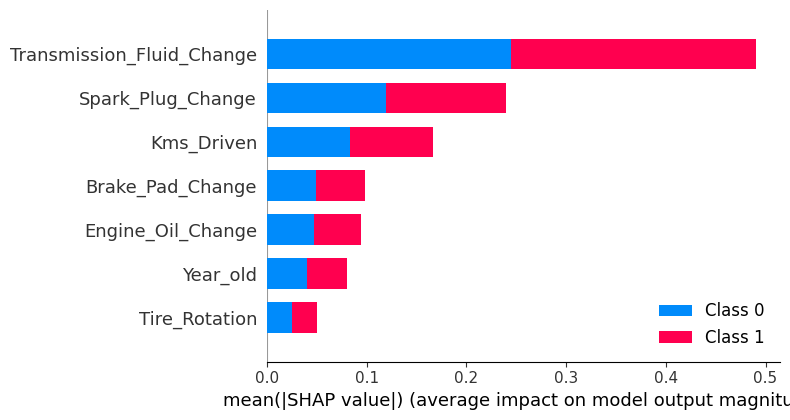

In [49]:
#Using Random Forest model
# Create the explainer
explainer1 = shap.TreeExplainer(rf_classifier)

shap_values1 = explainer1.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


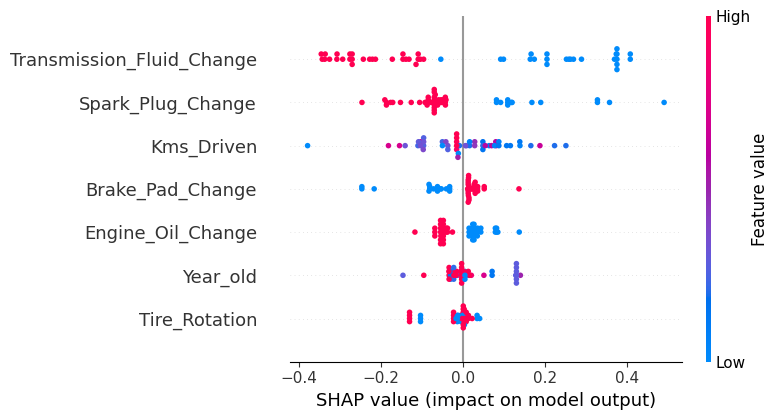

In [50]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

In [51]:
feature_importances = tree.feature_importances_

In [52]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(tree, X_train)

In [53]:
# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

In [54]:
# Make predictions
y_pred = tree.predict(X_test)

In [55]:
# Print individual SHAP explanations for a specific instance 
instance_index = 0
print("Predicted Class:", y_pred[instance_index])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[instance_index], X_test[instance_index])

Predicted Class: 1


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Kms_Driven'),
  Text(1, 0, 'Engine_Oil_Change'),
  Text(2, 0, 'Brake_Pad_Change'),
  Text(3, 0, 'Transmission_Fluid_Change'),
  Text(4, 0, 'Tire_Rotation'),
  Text(5, 0, 'Spark_Plug_Change'),
  Text(6, 0, 'Year_old')])

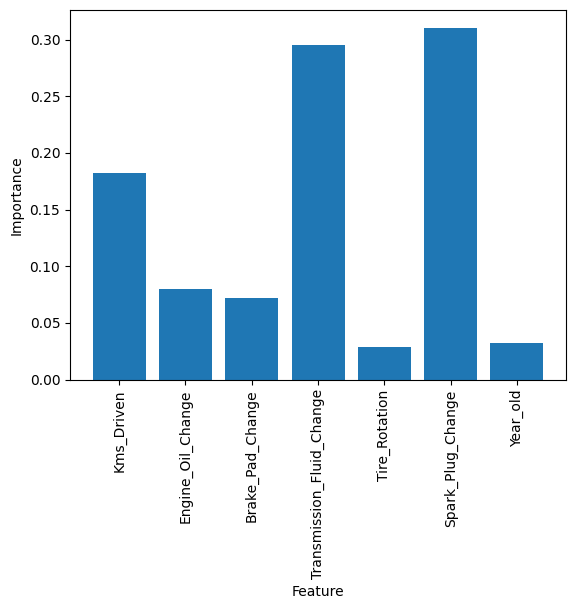

In [56]:
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90) 


In [57]:
#Importing LIME
import lime
from lime import lime_tabular

In [58]:
from interpret.blackbox import LimeTabular

In [59]:
from lime.lime_tabular import LimeTabularExplainer

In [60]:
from interpret import show

In [61]:
import pipeline

In [62]:
X_train_df = pd.DataFrame(X_train, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [63]:
X_test_df = pd.DataFrame(X_test, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [64]:
explainer = LimeTabularExplainer(training_data=X_train,
                                 mode="classification",
                                 feature_names=X.columns,
                                 class_names=["No need", "Need"],
                                 discretize_continuous=True,
                                 random_state=1)

In [65]:
predict_fn = lambda x: tree.predict_proba(x)

In [66]:
explanation = explainer.explain_instance(X_test_df.iloc[0], predict_fn, top_labels=1)

In [67]:
explanation.show_in_notebook()

In [68]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance = [(35000,1,0,0,1,0,8)]

In [69]:
X_instance_array = np.array(X_instance)

# Reshape the NumPy array
X_instance_array = X_instance_array[np.newaxis, :]
X_instance_array = X_instance_array.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array)[0]

In [70]:
predict_fn = lambda x: tree.predict_proba(X_instance_array)

In [71]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array[0], tree.predict_proba, top_labels=1)

In [72]:
explanation1.show_in_notebook()

In [73]:
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       55000                  1                 0                          0   
1       35000                  1                 0                          0   
2       65000                  0                 1                          0   
3       15000                  1                 0                          1   
4       30000                  0                 1                          0   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0              1                  1                     0        15  
1              1                  0                     1         8  
2              1                  0                     1        15  
3              0                  1                     0        15  
4              1                  1                     1        15

In [74]:
#Here we give input to model and predict
predicted = lr_model.predict([[35000,1,0,0,1,0,8]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


In [75]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance1 = [(35000,1,0,0,1,0,8)]

In [76]:
X_instance_array1 = np.array(X_instance1)

# Reshape the NumPy array
X_instance_array1 = X_instance_array1[np.newaxis, :]
X_instance_array1 = X_instance_array1.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array1)[0]

In [77]:
predict_fn = lambda x: tree.predict_proba(X_instance_array1)

In [78]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array1[0], tree.predict_proba, top_labels=1)
explanation1.show_in_notebook()